In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../../../Data/placement_package.csv')
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0], df.iloc[:,1], test_size=0.2, random_state=2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160,), (40,), (160,), (40,))

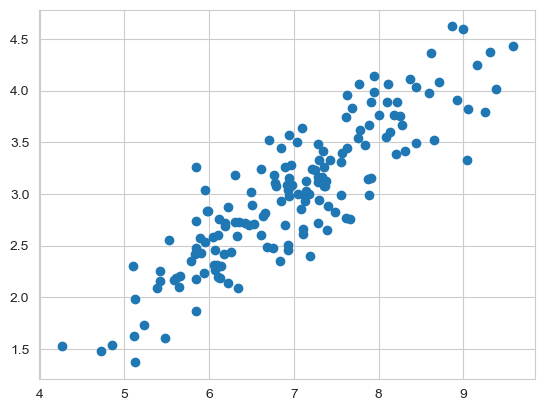

In [4]:
plt.scatter(X_train, y_train)

In [5]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

![A descriptive alt text](simple_linear_regression.png)

In [6]:
class LinearRegression:
    def __init__(self):
        self.m = None
        self.b = None

    def fit(self, X_train, y_train):
        # Use iloc if inputs are Pandas Series
        x_mean = X_train.mean()
        y_mean = y_train.mean()

        num = 0
        deno = 0

        for i in range(len(X_train)):
            num += (X_train.iloc[i] - x_mean) * (y_train.iloc[i] - y_mean)
            deno += (X_train.iloc[i] - x_mean) ** 2

        self.m = num / deno
        self.b = y_mean - (self.m * x_mean)

    def predict(self, X_test):
        return (X_test * self.m) + self.b


In [7]:
lr = LinearRegression()

In [8]:
lr.fit(X_train,y_train)

In [9]:
y_pred = lr.predict(X_test)

In [10]:
y_pred

,cgpa
112,3.891116
29,3.093245
182,2.384646
199,2.574349
193,1.653729
85,1.776478
10,2.072193
54,2.931439
115,3.762787
35,2.937018


In [11]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7807301475103842

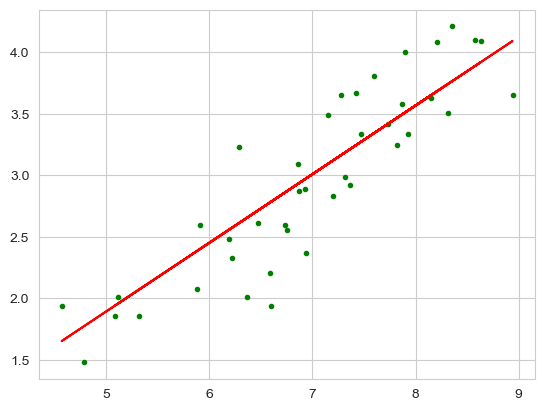

In [12]:
plt.plot(X_test, y_test,'g.')
plt.plot(X_test, y_pred,'r-')